In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from pyimcom.config import Config, Settings as Stn
from pyimcom.coadd import Block

General input information:
number of input frames =  4 type = [None, 'whitenoise1', '1fnoise2', 'cstar14']
acceptance radius --> 1.250000 arcsec or 50.000000 output pixels

Getting observations from /users/PCON0003/cond0007/imcom/coadd-test-fall2022/observing_sequence_hls_06_21.fits
Retrieved columns: ['date', 'exptime', 'constraint', 'ra', 'dec', 'pa', 'program', 'filter', 'gal_lon', 'gal_lat', 'ec_lon', 'ec_lat', 'sun_ang_los', 'rol_ang_sun', 'earth_ang_los', 'roll_ang_earth', 'zodi_bright', 'EBV', 'slew_ang_from', 'slew_ang_to', 'yaw', 'comment']  175032 rows
Output information: ctr at RA= 53.000000,DEC=-40.000000
pixel scale=0.025000 arcsec or 6.94444E-06 degree
output array size = 2600 (52 postage stamps of 50)

sub-block    0 < 0, 0> of 48x48=2304
outputs directed to --> /users/PAS2055/kailicao/pyimcom_dev/test/test4C_Yband_00_00
temporary storage directed to --> /tmp/kailicao-tempy_0000_20240629155826549323_cache
0 [[ 53.52615519 -40.39950529]]
1 [[ 53.50244699 -40.3996099 ]]
2 

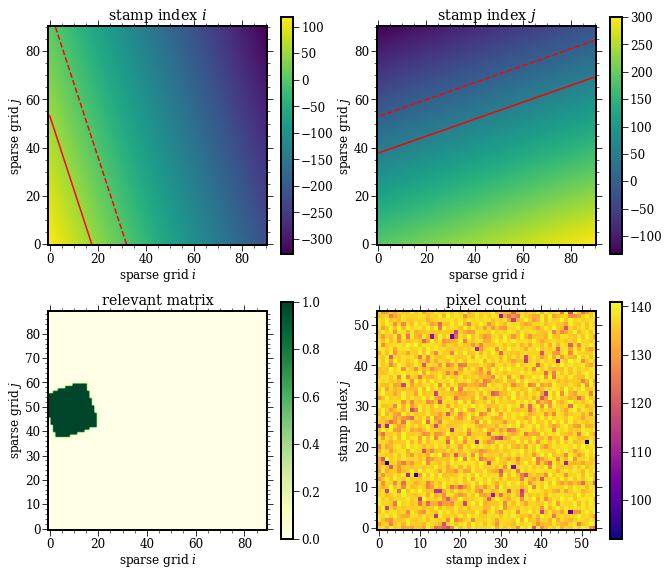


input image (95061, 3)
noise rng: frame_q=1, seed=21095061
noise rng: frame_q=2, seed=39095061 --> 1/f
making grid using C routines:  14 (95061, 3)
Cosmic ray mask: good pix -->  16595919 / 16711744


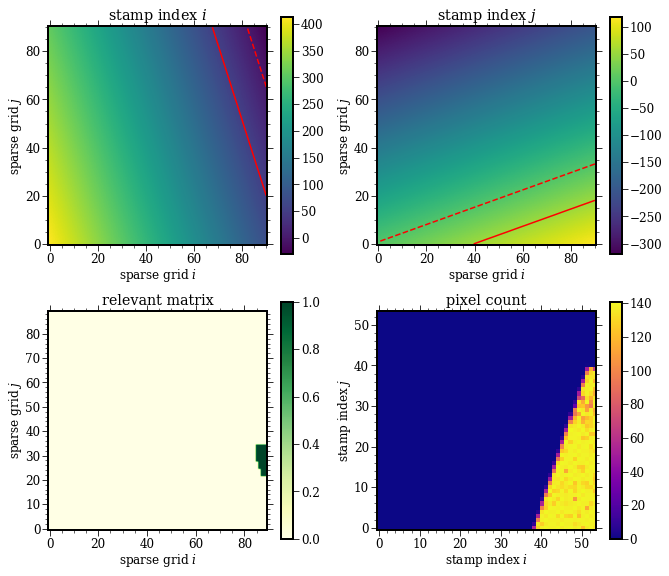


input image (95061, 12)
noise rng: frame_q=1, seed=30095061
noise rng: frame_q=2, seed=48095061 --> 1/f
making grid using C routines:  14 (95061, 12)
Cosmic ray mask: good pix -->  16596593 / 16711744


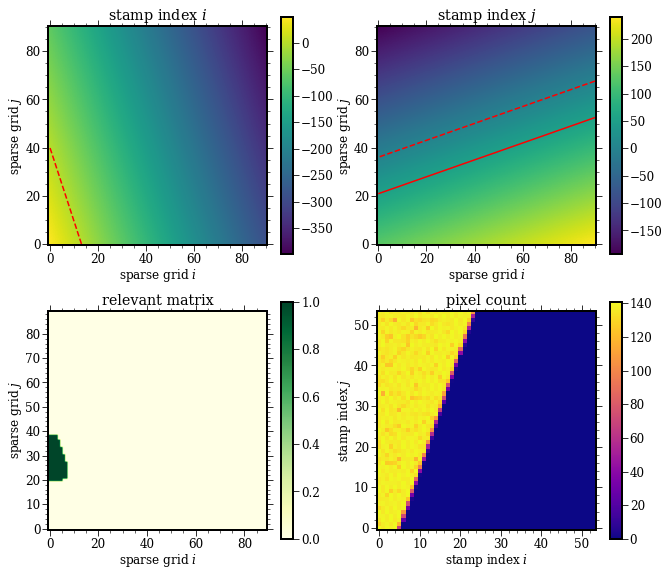


input image (95062, 3)
noise rng: frame_q=1, seed=21095062
noise rng: frame_q=2, seed=39095062 --> 1/f
making grid using C routines:  14 (95062, 3)
Cosmic ray mask: good pix -->  16596457 / 16711744


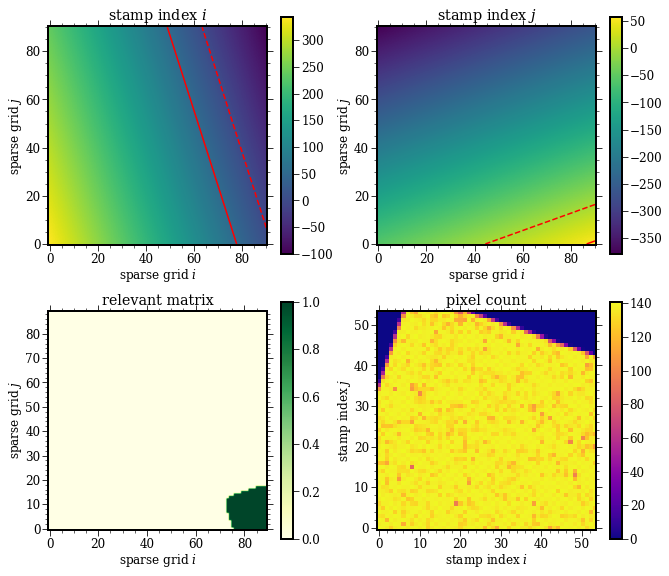


input image (132152, 12)
noise rng: frame_q=1, seed=30132152
noise rng: frame_q=2, seed=48132152 --> 1/f
making grid using C routines:  14 (132152, 12)
Cosmic ray mask: good pix -->  16596775 / 16711744


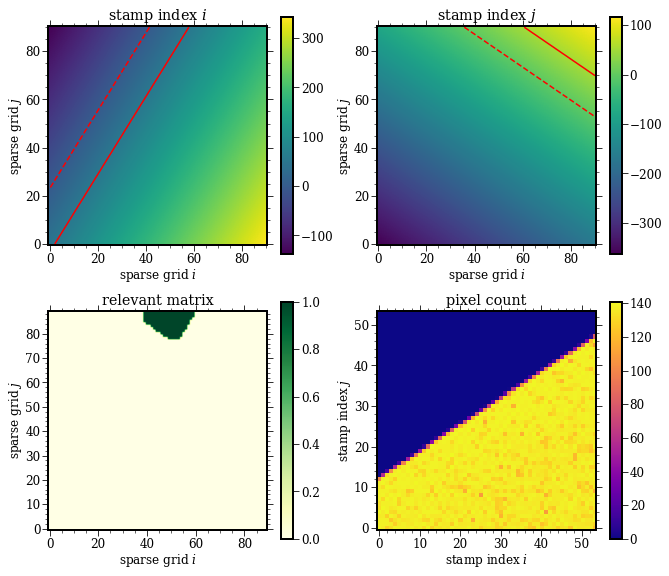


input image (132153, 12)
noise rng: frame_q=1, seed=30132153
noise rng: frame_q=2, seed=48132153 --> 1/f
making grid using C routines:  14 (132153, 12)
Cosmic ray mask: good pix -->  16595791 / 16711744


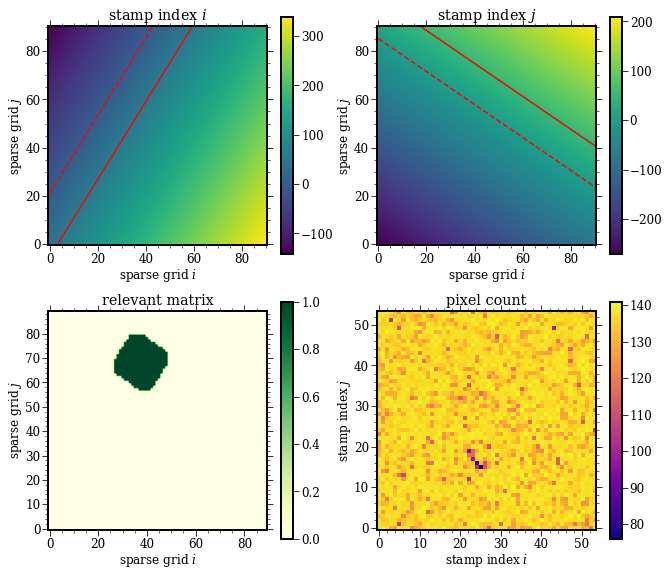


input image (132154, 12)
noise rng: frame_q=1, seed=30132154
noise rng: frame_q=2, seed=48132154 --> 1/f
making grid using C routines:  14 (132154, 12)
Cosmic ray mask: good pix -->  16596750 / 16711744


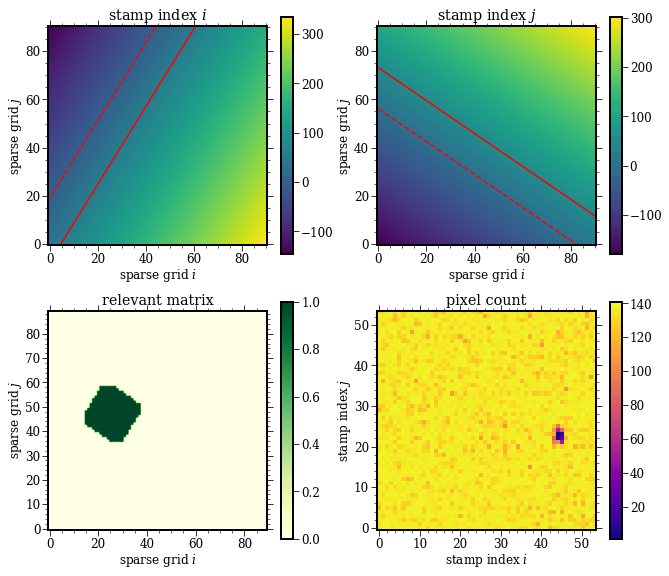


input image (132155, 10)
noise rng: frame_q=1, seed=28132155
noise rng: frame_q=2, seed=46132155 --> 1/f
making grid using C routines:  14 (132155, 10)
Cosmic ray mask: good pix -->  16595923 / 16711744


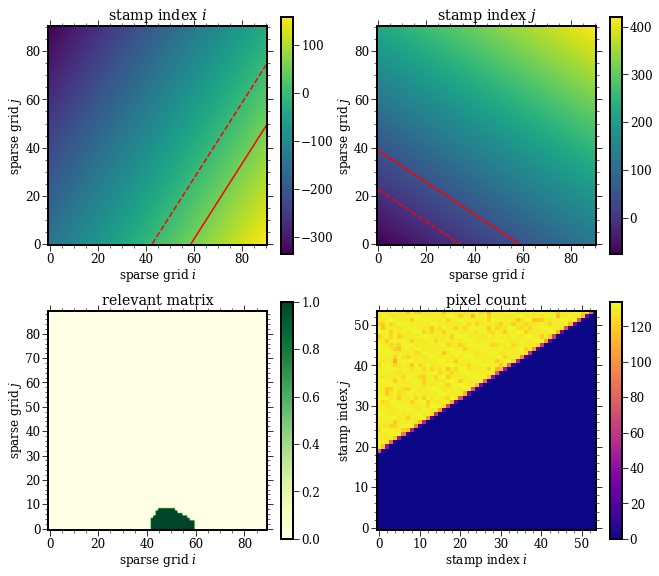


number of input pixels in output region: n_inpix_out = 1600686
number of input pixels in padding region: n_inpix_pad = 286006



In [2]:
cfg = Config()
cfg.extrainput = [None, 'whitenoise1', '1fnoise2', 'cstar14']
# cfg.extrainput = [None]
cfg.n_inframe = len(cfg.extrainput)
# cfg.stoptile = 4
cfg.pad_sides = 'all'

cfg.fade_kernel = 3
cfg.n2f = cfg.n2 + cfg.fade_kernel * 2
cfg.instamp_pad = 1.25 * Stn.arcsec
cfg.linear_algebra = 'Cholesky'
cfg.kappaC_arr = np.array([2e-4])

blk = Block(cfg=cfg, this_sub=0, run_coadd=False)
blk.parse_config()
blk.process_input_images(visualize=True)
blk.build_input_stamps()
blk.coadd_output_stamps(sim_mode=True)

# Postage stamp coaddition (coadd.py)

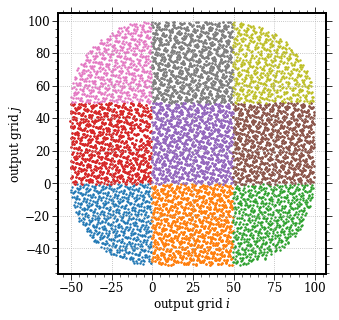

INPUT/PSF computation at RA= 53.5262, Dec=-40.3995; using input exposures: [0, 2, 3, 4, 5, 6]
INPUT/PSF computation at RA= 53.5252, Dec=-40.3995; using input exposures: [0, 2, 3, 4, 5, 6]
INPUT/PSF computation at RA= 53.5261, Dec=-40.3988; using input exposures: [0, 2, 3, 4, 5, 6]
INPUT/PSF computation at RA= 53.5252, Dec=-40.3988; using input exposures: [0, 2, 3, 4, 5, 6]

OutStamp._visualize_system_matrices
self.sysmata.shape=(6643, 6643)
np.all(self.sysmata == self.sysmata.T)=True


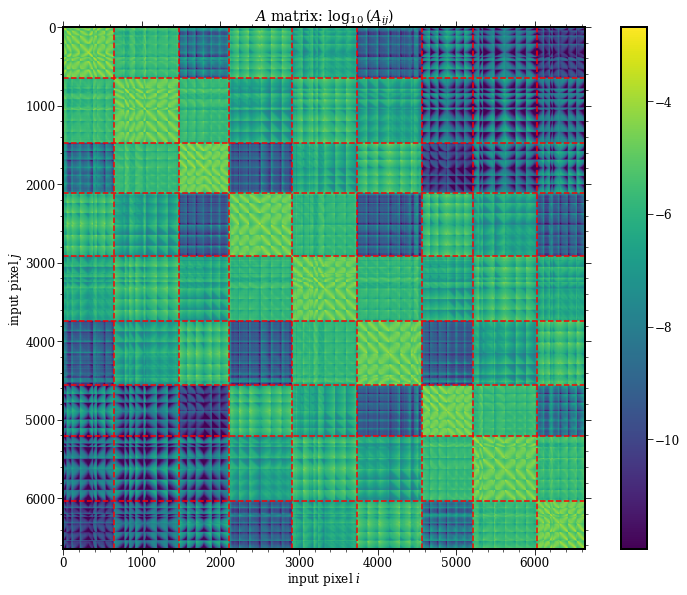

self.mhalfb.shape=(1, 3136, 6643)


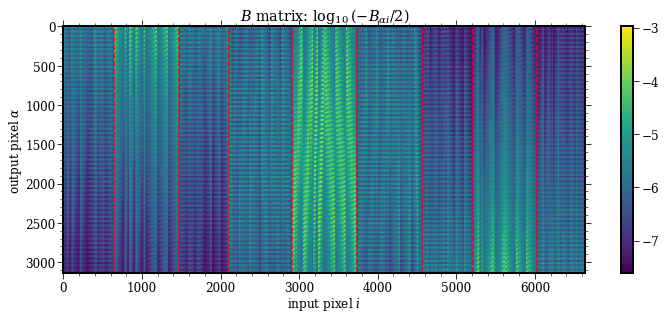

self.outovlc.shape=(1,)
  n input pix = 6643
  sqUC,sqSig %iles | 50% 1.00E-03 1.68E-01 | 90% 1.41E-03 1.76E-01 | 98% 1.65E-03 1.94E-01 | 99% 1.72E-03 2.08E-01 |

OutStamp._visualize_coadd_matrices
output PSF: 0


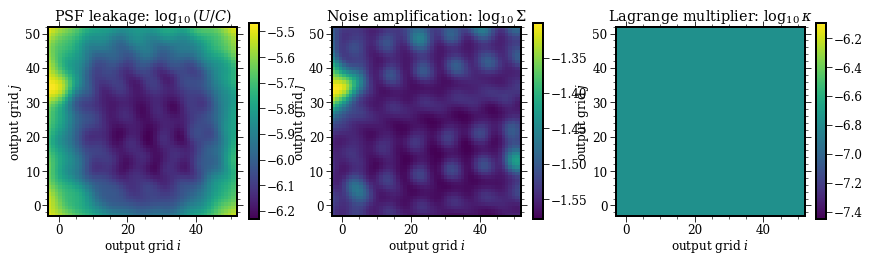

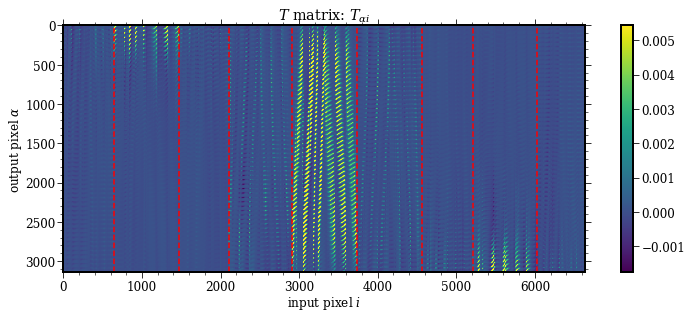


OutStamp._visualize_weight_computations
output PSF: 0


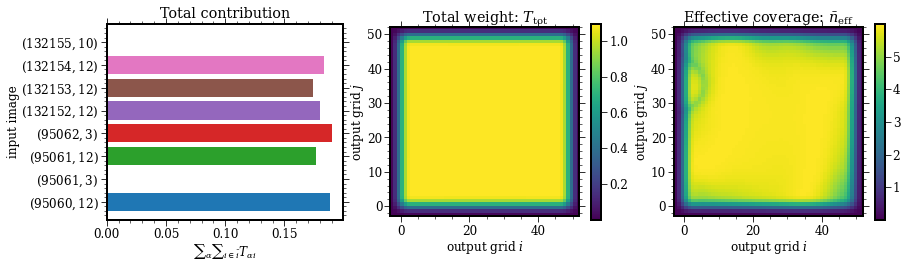


OutStamp._show_in_and_out_images


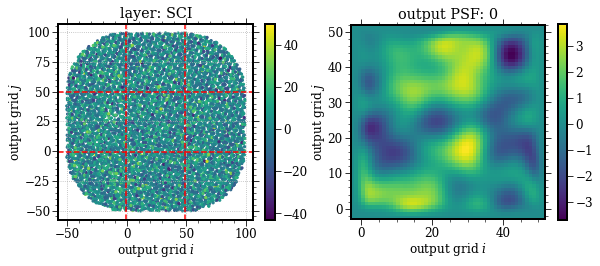

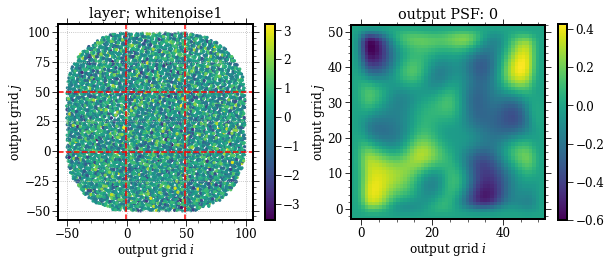

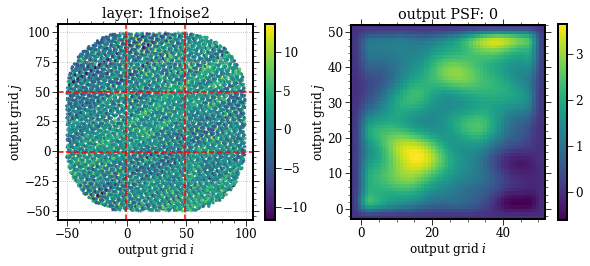

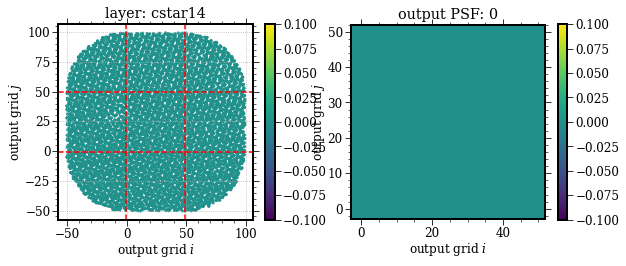


OutStamp._study_individual_pixels


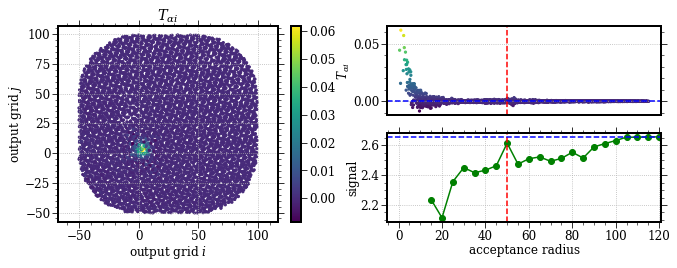

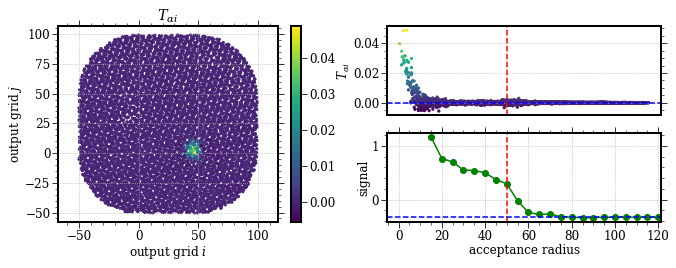

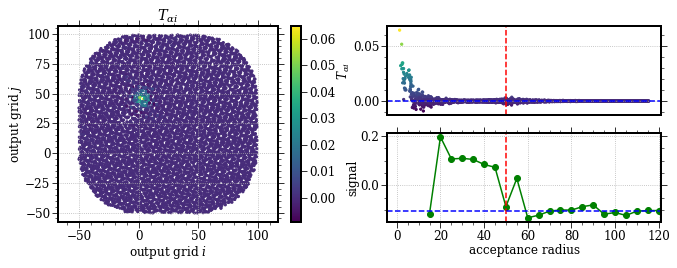

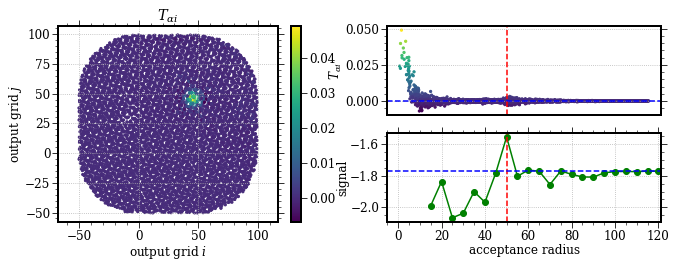

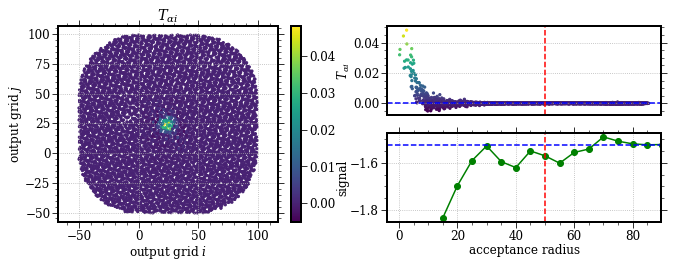

(self.inx_val[in_idx], self.iny_val[in_idx])=(2.938092923606746, 3.4739566646603635)


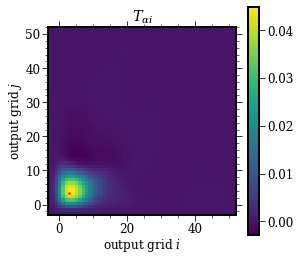

(self.inx_val[in_idx], self.iny_val[in_idx])=(46.25007230772462, 2.5722367012131144)


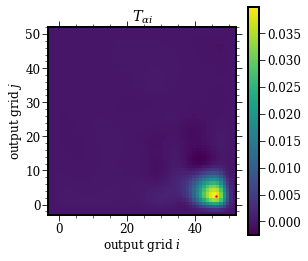

(self.inx_val[in_idx], self.iny_val[in_idx])=(4.110419542703312, 45.3231734023866)


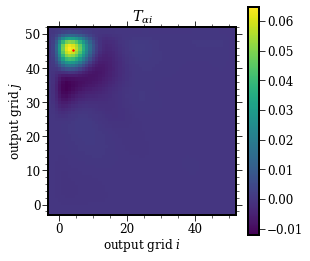

(self.inx_val[in_idx], self.iny_val[in_idx])=(46.28120716784906, 46.588259113792446)


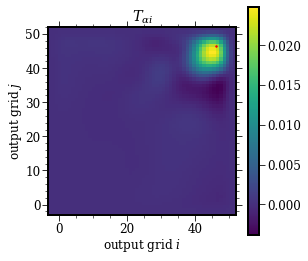

(self.inx_val[in_idx], self.iny_val[in_idx])=(24.14741168949695, 23.85604855175916)


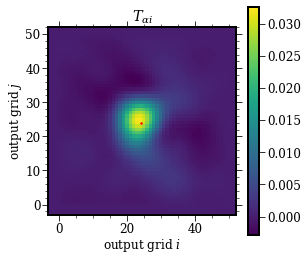

In [3]:
outst = blk.outstamps[1][1]
outst._process_input_stamps(visualize=True)
outst(visualize=True, save_abc=True, save_t=True)

# PSF arrays and overlaps (psfutil.py)

In [4]:
from pyimcom.psfutil import PSFGrp, PSFOvl
try:
    from pyimcom_croutines import iD5512C, iD5512C_sym, gridD5512C
except:
    from .routine import iD5512C, iD5512C_sym, gridD5512C

output PSF: 0


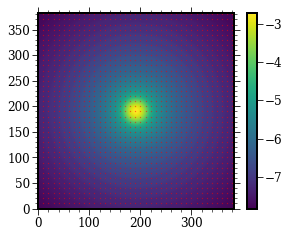

In [5]:
outpsfgrp = PSFGrp(in_or_out=False, blk=blk, visualize=True)

INPUT/PSF computation at RA= 53.5262, Dec=-40.3995; using input exposures: [0, 2, 3, 4, 5, 6]
The PSF below is from InImage (95060, 12) at the upper right corner of InStamp (0, 0)


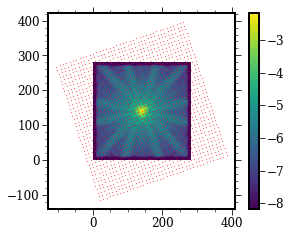

The PSF below is from InImage (95061, 12) at the upper right corner of InStamp (0, 0)


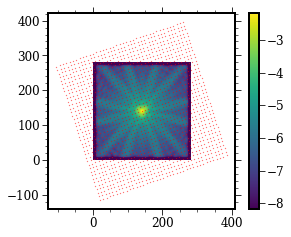

The PSF below is from InImage (95062, 3) at the upper right corner of InStamp (0, 0)


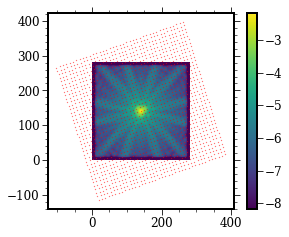

The PSF below is from InImage (132152, 12) at the upper right corner of InStamp (0, 0)


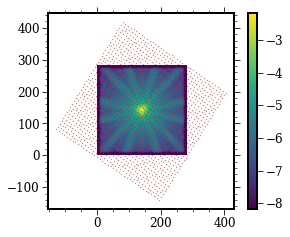

The PSF below is from InImage (132153, 12) at the upper right corner of InStamp (0, 0)


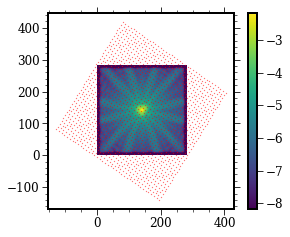

The PSF below is from InImage (132154, 12) at the upper right corner of InStamp (0, 0)


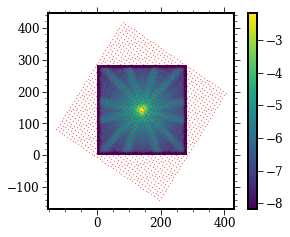

INPUT/PSF computation at RA= 53.5252, Dec=-40.3995; using input exposures: [0, 2, 3, 4, 5, 6]


In [6]:
inpsfgrp00 = PSFGrp(in_or_out=True, inst=blk.instamps[0][0], visualize=True)
inpsfgrp02 = PSFGrp(in_or_out=True, inst=blk.instamps[0][2], visualize=False)

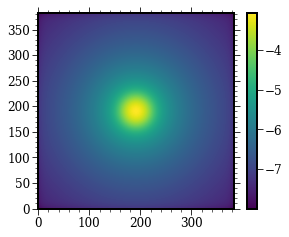

In [7]:
outpsfovl = PSFOvl(outpsfgrp, visualize=True)

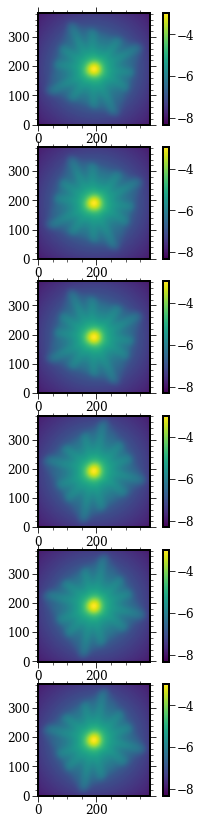

In [8]:
iopsfovl = PSFOvl(inpsfgrp00, outpsfgrp, visualize=True)

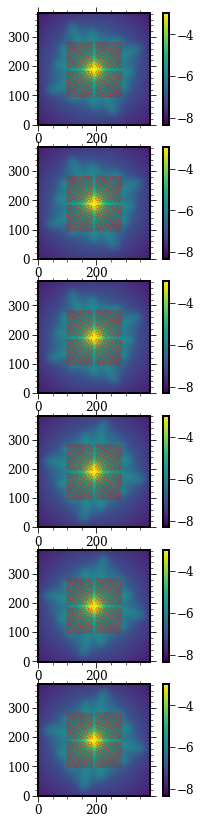

In [9]:
_ = iopsfovl(blk.instamps[1][1], blk.outstamps[1][1], visualize=True)

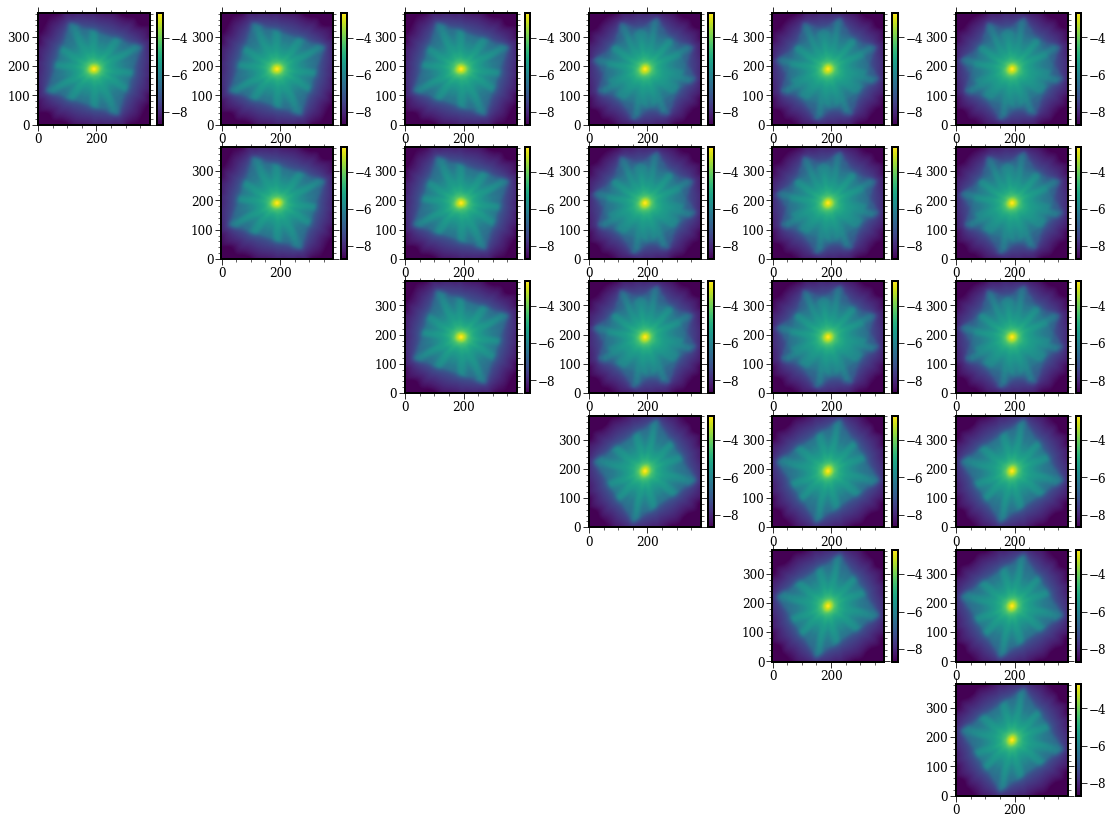

In [10]:
inpsfovl_s = PSFOvl(inpsfgrp00, visualize=True)  # _s: self

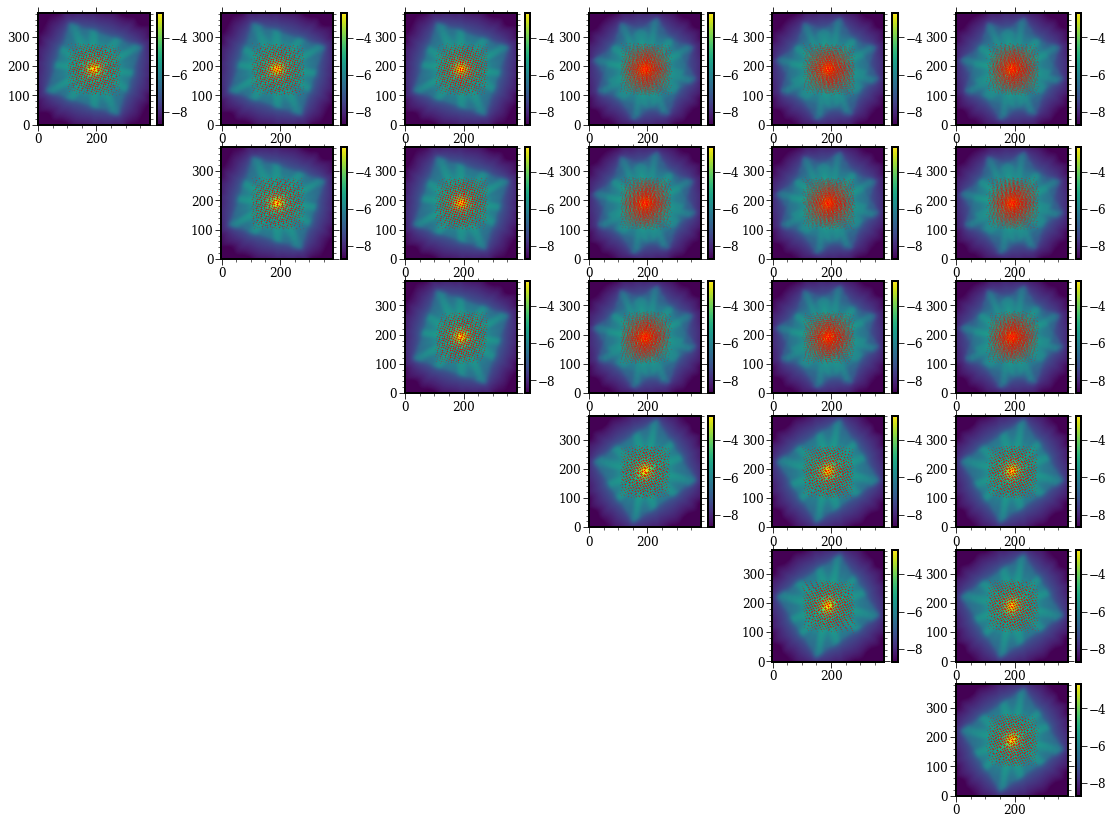

In [11]:
_ = inpsfovl_s(blk.instamps[1][1], None, visualize=True)

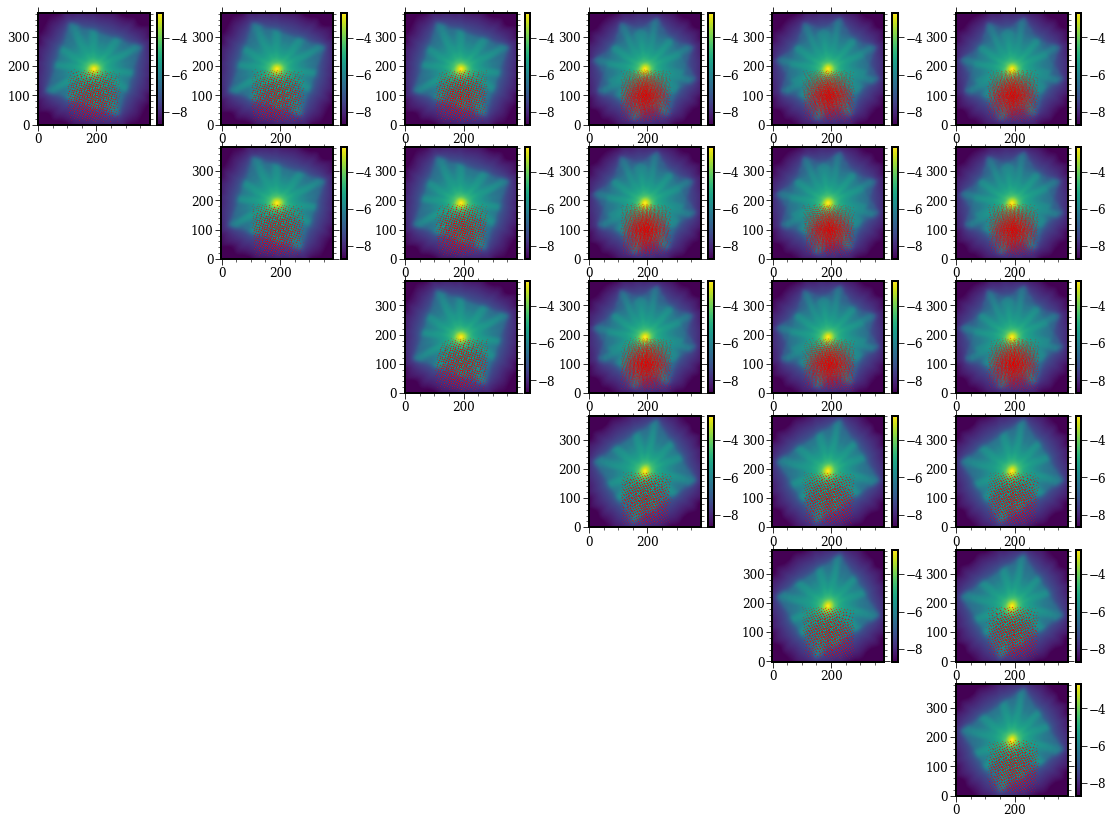

In [12]:
_ = inpsfovl_s(blk.instamps[0][1], blk.instamps[1][1], visualize=True)

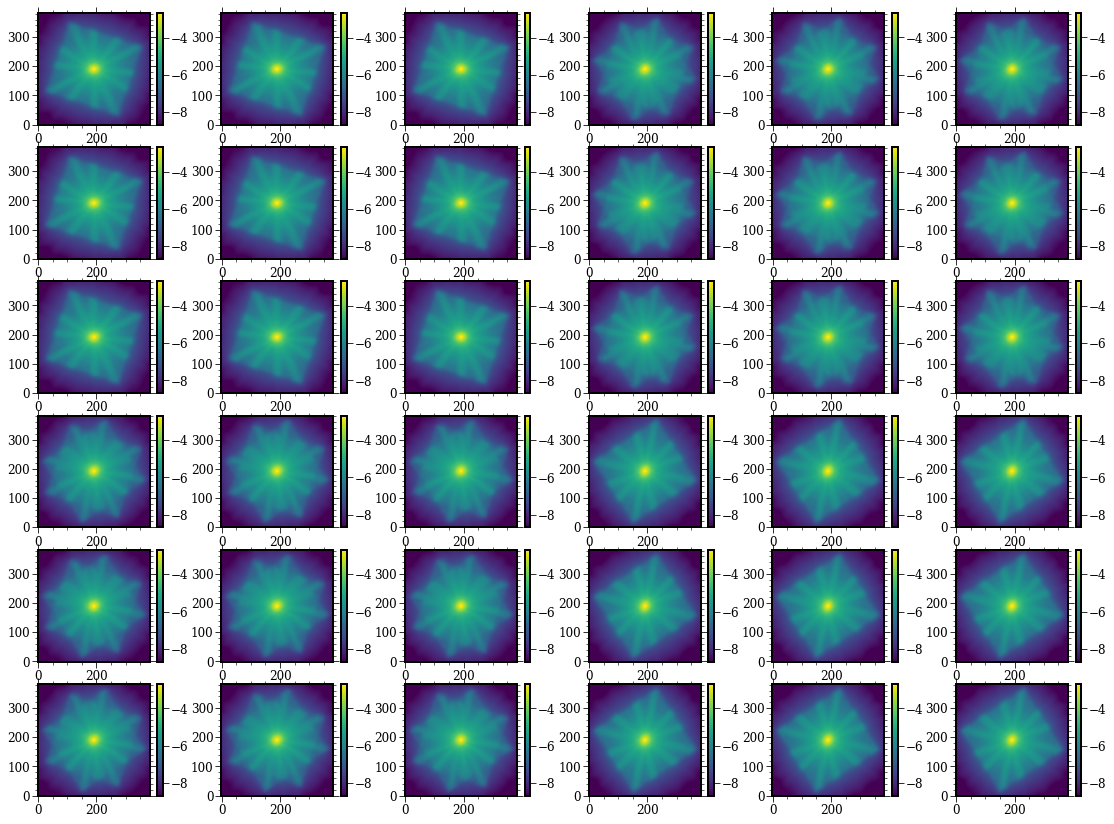

In [13]:
inpsfovl_c = PSFOvl(inpsfgrp00, inpsfgrp02, visualize=True)  # _c: cross

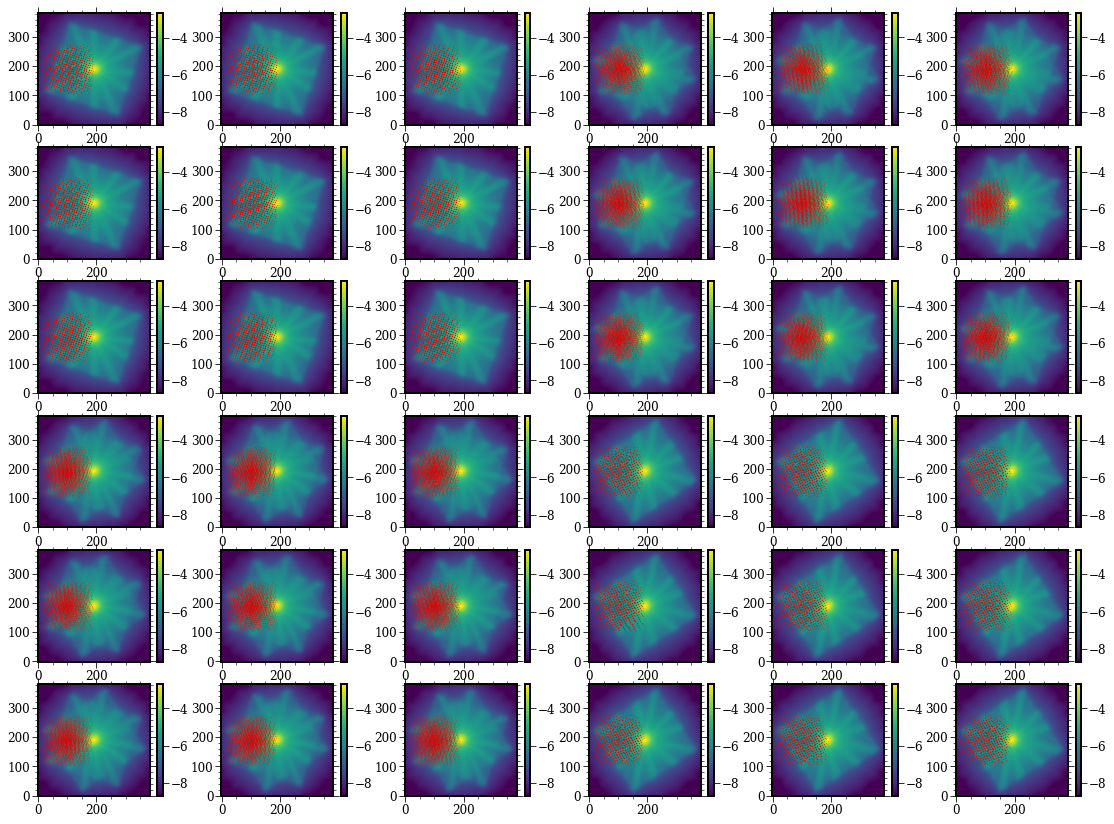

In [14]:
_ = inpsfovl_c(blk.instamps[1][1], blk.instamps[1][2], visualize=True)